Superstore Sales Exploratory Data Analysis (EDA)

Project Objective:

Project Overview:

Cleaned and analyzed retail sales data using Pandas

Performed univariate, bivariate, and time-series analysis

Engineered shipping delay and temporal features

Visualized business insights using Matplotlib and Seaborn

In [3]:
# importing all nessasory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [4]:
#loading data from csv
df=pd.read_csv(r"SalesData.csv")

In [5]:
# fetching structure of dataset
df.shape

(9800, 18)

In [6]:
# fetching top rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
# seeing dataset describtion
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [9]:
# Checking for Null Values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
# Postal Code has 11 missing values
df['Postal Code'] = df['Postal Code'].fillna(0)

In [11]:
# converting datatype from object to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [13]:
df['Order Date'] 

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9800, dtype: datetime64[ns]

In [14]:
df['Order Date'].isnull().sum()

0

In [15]:
df['Ship Date']

0      2017-11-11
1      2017-11-11
2      2017-06-16
3      2016-10-18
4      2016-10-18
          ...    
9795   2017-05-28
9796   2016-01-17
9797   2016-01-17
9798   2016-01-17
9799   2016-01-17
Name: Ship Date, Length: 9800, dtype: datetime64[ns]

In [16]:
df['Ship Date'].isnull().sum()

0

In [17]:
# creating year month & monthname column for better analysis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.month_name()

In [18]:
# creating shipping dealy column for analysis
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

In [19]:
# checking for duplicate values
df.duplicated().sum()

0

In [20]:
# dropping duplicate values
df = df.drop_duplicates()

In [21]:
# check for null values in year column
df['Order Year'].isnull().sum()

0

In [22]:
# check for null values in month column

df['Order Month'].isnull().sum()

0

In [23]:
# check for null values in month name column

df['Order Month Name'].isnull().sum()

0

In [24]:
df['Shipping Delay']

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Shipping Delay, Length: 9800, dtype: int64

In [25]:
# check for null values in shipping delay  column

df['Shipping Delay'].isnull().sum()

0

In [26]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Order Month Name,Shipping Delay
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,November,3
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,November,3
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,June,4
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,October,7
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,October,7


In [27]:
# have only one value (united states)
df["Country"].unique()

array(['United States'], dtype=object)

In [28]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month',
       'Order Month Name', 'Shipping Delay'],
      dtype='object')

In [29]:
eda_columns = ['Order Date','Order Year','Order Month','Order Month Name','Ship Mode','Shipping Delay','Segment','Category','Sub-Category'
               ,'Region','State','City','Sales']

df_eda = df[eda_columns].copy()

In [30]:
df_eda

,Order Date,Order Year,Order Month,Order Month Name,Ship Mode,Shipping Delay,Segment,Category,Sub-Category,Region,State,City,Sales
0,2017-11-08,2017,11,November,Second Class,3,Consumer,Furniture,Bookcases,South,Kentucky,Henderson,261.9600
1,2017-11-08,2017,11,November,Second Class,3,Consumer,Furniture,Chairs,South,Kentucky,Henderson,731.9400
2,2017-06-12,2017,6,June,Second Class,4,Corporate,Office Supplies,Labels,West,California,Los Angeles,14.6200
3,2016-10-11,2016,10,October,Standard Class,7,Consumer,Furniture,Tables,South,Florida,Fort Lauderdale,957.5775
4,2016-10-11,2016,10,October,Standard Class,7,Consumer,Office Supplies,Storage,South,Florida,Fort Lauderdale,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017,5,May,Standard Class,7,Corporate,Office Supplies,Binders,Central,Illinois,Chicago,3.7980
9796,2016-01-12,2016,1,January,Standard Class,5,Corporate,Office Supplies,Art,East,Ohio,Toledo,10.3680
9797,2016-01-12,2016,1,January,Standard Class,5,Corporate,Technology,Phones,East,Ohio,Toledo,235.1880
9798,2016-01-12,2016,1,January,Standard Class,5,Corporate,Technology,Phones,East,Ohio,Toledo,26.3760


1) Sales Distribution

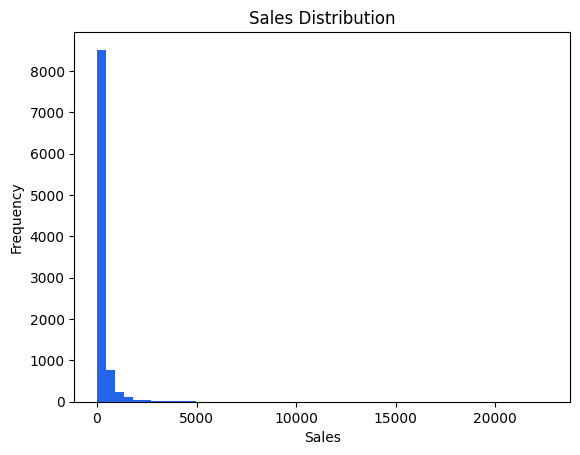

In [31]:
plt.figure()
plt.hist(df_eda['Sales'], bins=50, color='#2563EB')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

2) Category Count

In [32]:
df_eda['Category'].value_counts()

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

3) Order Count by Category

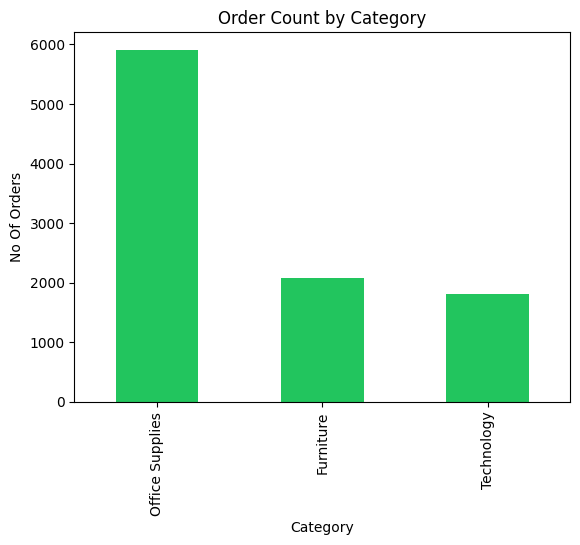

In [33]:
plt.figure()
df_eda['Category'].value_counts().plot(kind='bar',color='#22C55E' )
plt.title('Order Count by Category')
plt.ylabel('No Of Orders')
plt.show()

4) Sales By Category

In [34]:
category_sales = df_eda.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

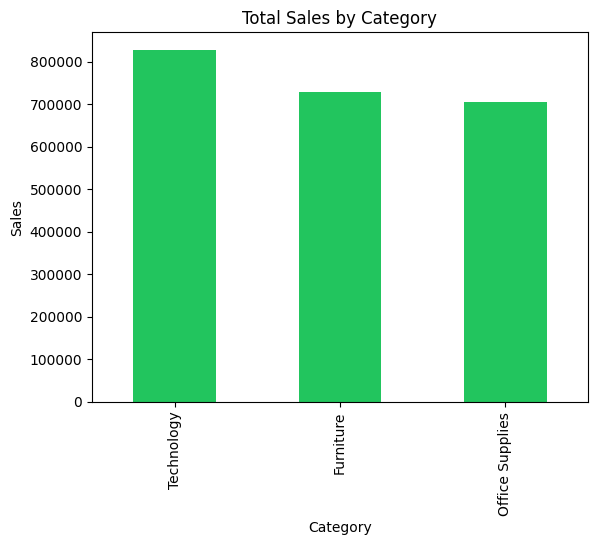

In [35]:
plt.figure()
category_sales.plot(kind='bar',color='#22C55E')
plt.title('Total Sales by Category')
plt.ylabel('Sales')
plt.show()

5) Sales by Region

In [36]:
region_sales = df_eda.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

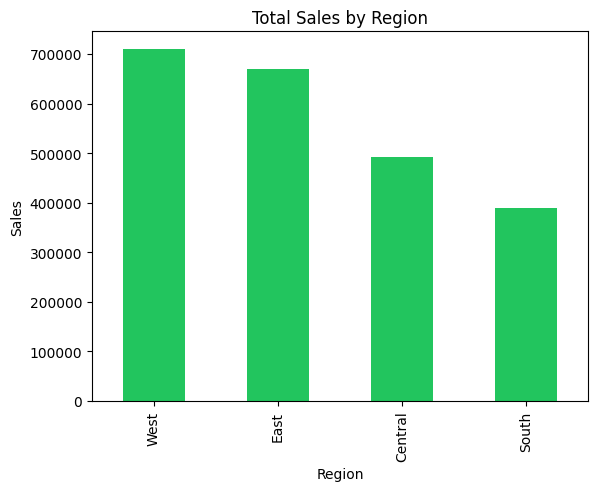

In [37]:
plt.figure()
region_sales.plot(kind='bar',color='#22C55E')
plt.title('Total Sales by Region')
plt.ylabel('Sales')
plt.show()

6) Sales By Segment

In [38]:
segment_sales = df_eda.groupby('Segment')['Sales'].sum()
segment_sales

Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

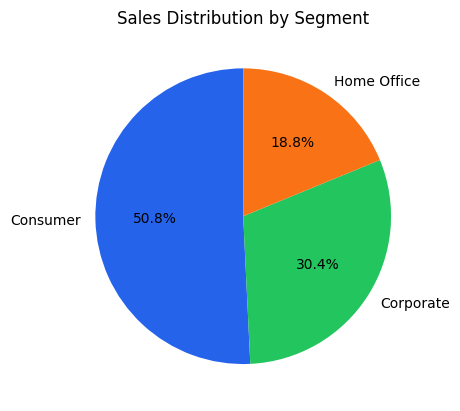

In [39]:
segment_sales.plot(kind='pie',autopct='%1.1f%%',colors=["#2563EB","#22C55E","#F97316"],startangle=90)
plt.ylabel('')
plt.title('Sales Distribution by Segment')
plt.show()

7) Sales by ship mode

In [40]:
shipmode_sales = df_eda.groupby('Ship Mode')['Sales'].sum()
shipmode_sales

Ship Mode
First Class       3.455723e+05
Same Day          1.252190e+05
Second Class      4.499142e+05
Standard Class    1.340831e+06
Name: Sales, dtype: float64

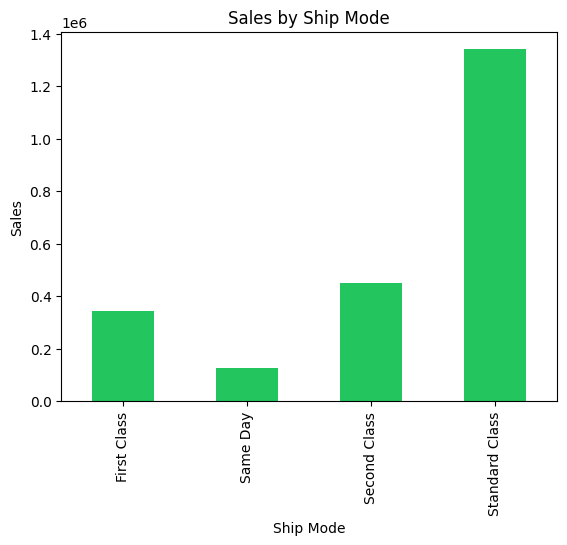

In [41]:
plt.figure()
shipmode_sales.plot(kind='bar',color='#22C55E')
plt.title('Sales by Ship Mode')
plt.ylabel('Sales')
plt.show()

8) Yearly Sales Trend

In [42]:
yearly_sales = df_eda.groupby('Order Year')['Sales'].sum()
yearly_sales

Order Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

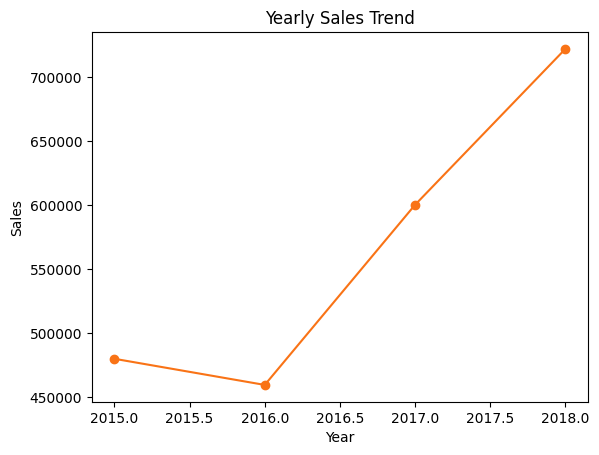

In [43]:
plt.figure()
yearly_sales.plot(marker='o', color='#F97316')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

9) Monthly Sales Trend

In [44]:
monthly_sales = df_eda.groupby('Order Month Name')['Sales'].sum().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

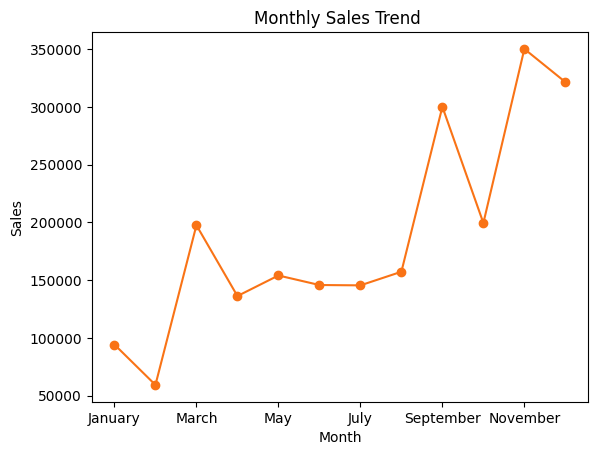

In [45]:
plt.figure()
monthly_sales.plot(kind='line', marker='o',color='#F97316' )
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend ')
plt.show()

10) Sales By State

In [46]:
state_sales = df_eda.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
state_sales

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64

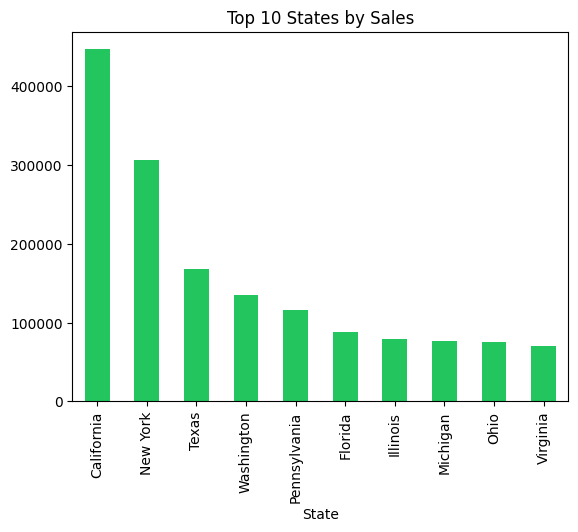

In [47]:
plt.figure()
state_sales.plot(kind='bar', color='#22C55E')
plt.title('Top 10 States by Sales')
plt.show()

11) Shipping Delay Distribution 

In [48]:
df_eda['Shipping Delay'].describe()

count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Shipping Delay, dtype: float64

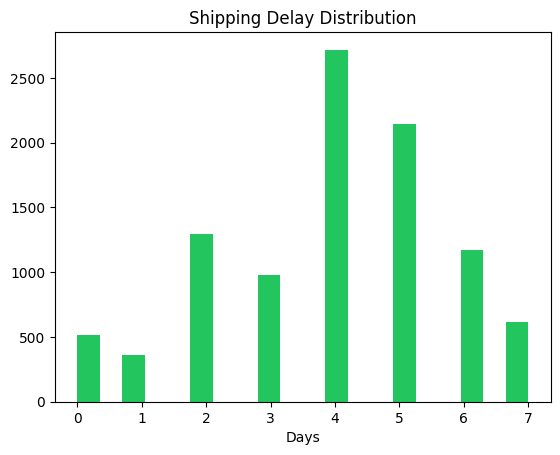

In [49]:
plt.figure()
plt.hist(df_eda['Shipping Delay'], bins=20,color='#22C55E')
plt.title('Shipping Delay Distribution')
plt.xlabel('Days')
plt.show()


Final Conclusions & Business Insights: